In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

ct_img = nib.load(r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_plan.nii")
X = ct_img.get_fdata()
X = (X - np.min(X)) / (np.max(X) - np.min(X))
spacing = ct_img.header.get_zooms()

def show_slice(slice_index, plane):
    plt.figure(figsize=(6, 6))
    if plane == 'Axial':
        img_slice = np.rot90(X[:, :, slice_index])
        aspect = spacing[1] / spacing[0]
    elif plane == 'Coronal':
        img_slice = np.flipud(np.rot90(X[:, slice_index, :]))
        aspect = spacing[2] / spacing[0]
    elif plane == 'Sagittal':
        img_slice = np.flipud(np.rot90(X[slice_index, :, :]))
        aspect = spacing[2] / spacing[1]
    plt.imshow(img_slice, cmap='gray', origin='lower', aspect=aspect)
    plt.title(f"{plane} slice {slice_index}")
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    plt.close()

plane_dropdown = widgets.Dropdown(
    options=['Axial', 'Coronal', 'Sagittal'],
    value='Axial',
    description='Plane:'
)

slice_slider = widgets.IntSlider(
    value=X.shape[2] // 2,
    min=0,
    max=X.shape[2] - 1,
    step=1,
    description='Slice:',
    continuous_update=True,
    layout=widgets.Layout(width='80%')
)

def update_slider_range(*args):
    plane = plane_dropdown.value
    if plane == 'Axial':
        slice_slider.max = X.shape[2] - 1
        slice_slider.value = X.shape[2] // 2
    elif plane == 'Coronal':
        slice_slider.max = X.shape[1] - 1
        slice_slider.value = X.shape[1] // 2
    elif plane == 'Sagittal':
        slice_slider.max = X.shape[0] - 1
        slice_slider.value = X.shape[0] // 2

plane_dropdown.observe(update_slider_range, names='value')
update_slider_range()

widgets.interact(show_slice, slice_index=slice_slider, plane=plane_dropdown)


interactive(children=(IntSlider(value=256, description='Slice:', layout=Layout(width='80%'), max=511), Dropdow…

<function __main__.show_slice(slice_index, plane)>

interactive(children=(IntSlider(value=256, description='Slice:', layout=Layout(width='80%'), max=511), Dropdow…

<function __main__.show_slice(slice_index, plane)>

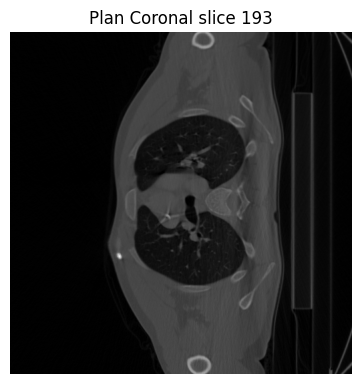

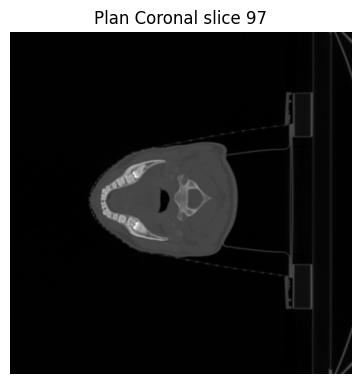

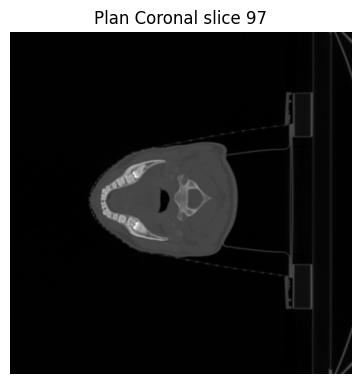

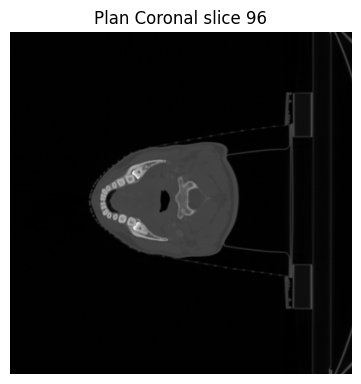

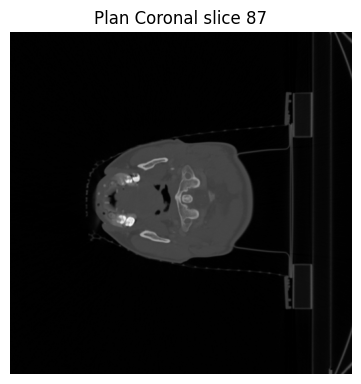

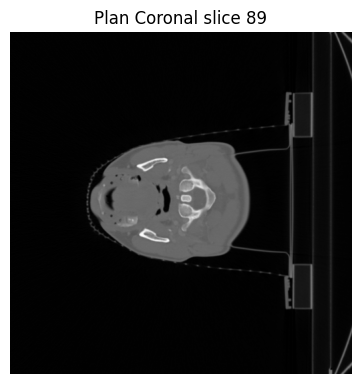

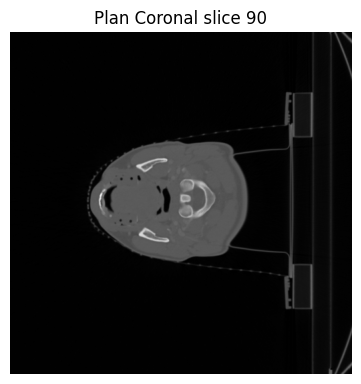

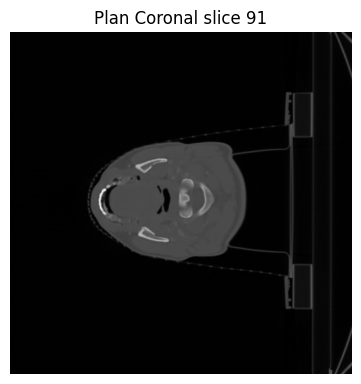

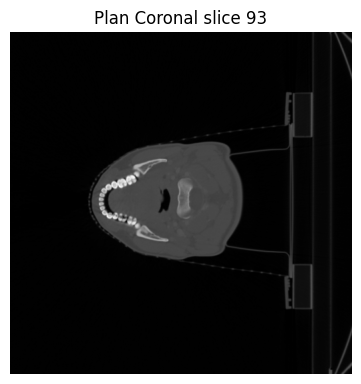

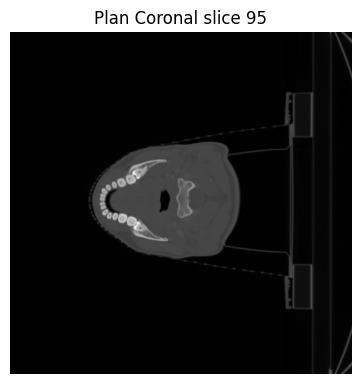

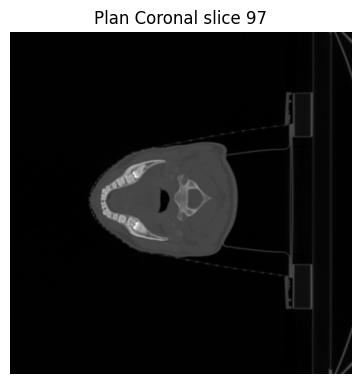

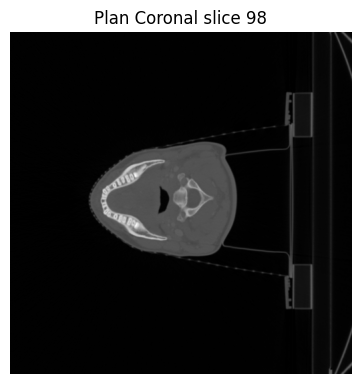

In [1]:
#view all 3 CTs on subplots
%matplotlib inline

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

ct_paths = [
    r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_plan.nii",
    r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_TP1.nii",
    r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_TP2.nii",
]

titles = ["Plan", "Timepoint 1", "Timepoint 2"]

cts = [nib.load(p).get_fdata() for p in ct_paths]
cts = [(X - np.min(X)) / (np.max(X) - np.min(X)) for X in cts]
spacings = [nib.load(p).header.get_zooms() for p in ct_paths]

def show_slice(slice_index, plane):
    plt.figure(figsize=(15, 5))
    for i, X in enumerate(cts):
        if plane == 'Axial':
            img_slice = np.rot90(X[:, :, slice_index])
            aspect = spacings[i][1] / spacings[i][0]
        elif plane == 'Coronal':
            img_slice = np.flipud(np.rot90(X[:, slice_index, :]))
            aspect = spacings[i][2] / spacings[i][0]
        elif plane == 'Sagittal':
            img_slice = np.flipud(np.rot90(X[slice_index, :, :]))
            aspect = spacings[i][2] / spacings[i][1]
        plt.subplot(1, 3, i+1)
        plt.imshow(img_slice, cmap='gray', origin='lower', aspect=aspect)
        plt.title(f"{titles[i]} {plane} slice {slice_index}")
        plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    plt.close()

plane_dropdown = widgets.Dropdown(
    options=['Axial', 'Coronal', 'Sagittal'],
    value='Axial',
    description='Plane:'
)

slice_slider = widgets.IntSlider(
    value=cts[0].shape[2] // 2,
    min=0,
    max=cts[0].shape[2] - 1,
    step=1,
    description='Slice:',
    continuous_update=True,
    layout=widgets.Layout(width='80%')
)

def update_slider_range(*args):
    plane = plane_dropdown.value
    X = cts[0]
    if plane == 'Axial':
        slice_slider.max = X.shape[2] - 1
        slice_slider.value = X.shape[2] // 2
    elif plane == 'Coronal':
        slice_slider.max = X.shape[1] - 1
        slice_slider.value = X.shape[1] // 2
    elif plane == 'Sagittal':
        slice_slider.max = X.shape[0] - 1
        slice_slider.value = X.shape[0] // 2

plane_dropdown.observe(update_slider_range, names='value')
update_slider_range()

widgets.interact(show_slice, slice_index=slice_slider, plane=plane_dropdown)


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

ct_paths = [
    r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_plan.nii",
    r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_TP1.nii",
    r"Z:\Angie\SMILE_facialdeformation\StJude_cohort\roughRR_images_mphys\1617496_TP2.nii",
]

titles = ["Plan", "Timepoint 1", "Timepoint 2"]

cts = [nib.load(p).get_fdata() for p in ct_paths]
cts = [(X - np.min(X)) / (np.max(X) - np.min(X)) for X in cts]
spacings = [nib.load(p).header.get_zooms() for p in ct_paths]

def show_slice(slice_index, plane):
    plt.figure(figsize=(15, 5))
    for i, X in enumerate(cts):
        if plane == 'Axial':  # actually coronal in array
            if slice_index >= X.shape[1]:
                continue
            img_slice = np.flipud(np.rot90(X[:, slice_index, :]))
            aspect = spacings[i][2] / spacings[i][0]
        elif plane == 'Coronal':  # actually sagittal
            if slice_index >= X.shape[0]:
                continue
            img_slice = np.flipud(np.rot90(X[slice_index, :, :]))
            aspect = spacings[i][2] / spacings[i][1]
        elif plane == 'Sagittal':  # actually axial
            if slice_index >= X.shape[2]:
                continue
            img_slice = np.rot90(X[:, :, slice_index])
            aspect = spacings[i][1] / spacings[i][0]
        plt.subplot(1, 3, i+1)
        plt.imshow(img_slice, cmap='gray', origin='lower', aspect=aspect)
        plt.title(f"{titles[i]} {plane} slice {slice_index}")
        plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    plt.close()


plane_dropdown = widgets.Dropdown(
    options=['Axial', 'Coronal', 'Sagittal'],
    value='Axial',
    description='Plane:'
)

slice_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Slice:',
    continuous_update=True,
    layout=widgets.Layout(width='80%')
)

def update_slider_range(*args):
    plane = plane_dropdown.value
    max_slices = []
    for X in cts:
        if plane == 'Axial':
            max_slices.append(X.shape[1])
        elif plane == 'Coronal':
            max_slices.append(X.shape[0])
        elif plane == 'Sagittal':
            max_slices.append(X.shape[2])
    slice_slider.max = min(max_slices) - 1
    slice_slider.value = slice_slider.max // 2


plane_dropdown.observe(update_slider_range, names='value')
update_slider_range()

widgets.interact(show_slice, slice_index=slice_slider, plane=plane_dropdown)


interactive(children=(IntSlider(value=42, description='Slice:', layout=Layout(width='80%'), max=85), Dropdown(…

<function __main__.show_slice(slice_index, plane)>